# Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import joblib
from sklearn.utils.class_weight import compute_class_weight

# Loading Dataset

In [9]:
df = pd.read_csv(r"C:\Users\Asaad\Desktop\Heart Attack Predictor\Data\heart.csv")
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [10]:
df.head() #To check the data is loaded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


# Data Exploration

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.info() #Basic information about the dara

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe() #generating summary of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


## Target class distribution

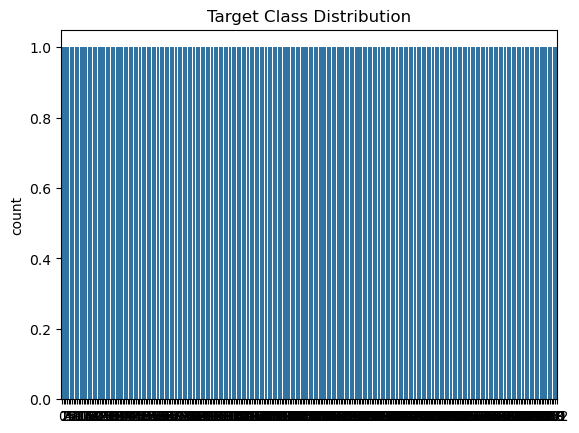

In [14]:
sns.countplot(df['target'])
plt.title("Target Class Distribution")
plt.show()

The target class distribution plot reveals an issue with the target variable, as it has a large number of unique classes, resulting in unreadable x-axis labels and each class having a count of 1. This suggests that the target variable may have high cardinality, possibly representing IDs or unique strings instead of meaningful categories, making it unsuitable for classification tasks. To address this, the target variable should be inspected for the number and frequency of unique values, and high-cardinality classes should be grouped or binned appropriately. Proper preprocessing and visualization adjustments are needed to ensure the data is suitable for analysis.

In [15]:
print(df['target'].value_counts())
print(df['target'].nunique())

target
0    164
1    139
Name: count, dtype: int64
2


### Target Class Distribution

- **Class 0**: Appears **164 times**.
- **Class 1**: Appears **139 times**.

The dataset shows a relatively balanced distribution between the two target classes, which is favorable for building a classification model.

## Heatmap correlation

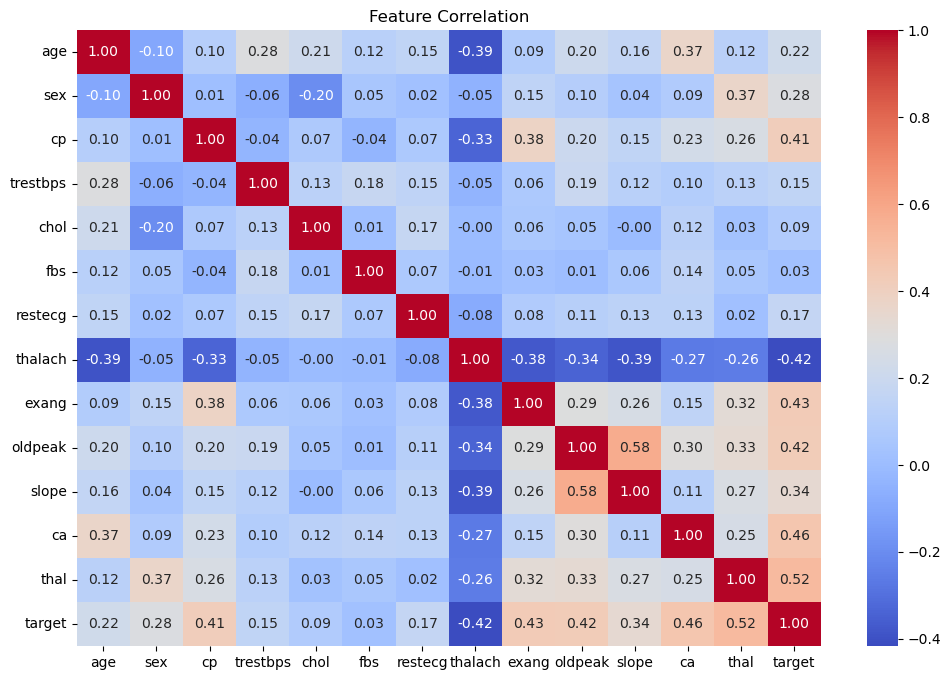

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

### Feature Correlation Summary

The correlation matrix reveals the relationships between various features and the target variable, which likely represents heart disease presence. Notably, features like **cp** (chest pain type), **thalach** (maximum heart rate), and **ca** (number of affected vessels) show moderate to strong correlations with the target, indicating their relevance in predicting heart disease. **Age** and **chol** (cholesterol) have negative correlations with **thalach**, suggesting older individuals with higher cholesterol tend to have lower heart rates. **Fasting blood sugar (fbs)** is negatively correlated with the target, indicating higher blood sugar levels are somewhat associated with a lower likelihood of heart disease. Overall, the matrix highlights important features like **cp**, **thalach**, and **ca**, which could be crucial for building a predictive model.

# Preprocessing

My dataset has no missing value as shown above

## Separate features and target

In [17]:
X = df.drop(columns=['target'])
y = df['target']

### Feature and Target Separation

- **X** is the DataFrame containing the feature variables (input data).
- **y** is the Series containing the target variable (output labels you want to predict).

This separation is essential for training machine learning models, where **X** (features) are used as inputs, and **y** (target) is the output the model learns to predict.

# Standardize features

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### How the `StandardScaler` Works

The `StandardScaler` works by:

1. **Removing the mean**: This step shifts the data so that the average (mean) of the data becomes 0. It centers the data around 0, making it easier for models to compare features without being biased by their original mean values.

2. **Scaling the data**: It scales the data so that the **standard deviation** becomes 1. This makes sure that the spread or dispersion of the data is uniform across all features.

By doing this, all features are put on the **same scale**, which helps the model learn more effectively and improves overall performance. This is especially important when using models that are sensitive to the scale of input data, such as **KNN** or **SVM**.

#### Why It's Important:
- Without scaling, features with larger values (e.g., salary in thousands of dollars vs. age in years) can dominate the model’s learning process, leading to biased predictions.
- **StandardScaler** ensures that each feature contributes equally to the model, resulting in more accurate and fair predictions.

### Example:
- Before scaling: `[100, 200, 300, 400, 500]`
- After scaling: `[0, -1, -0.5, 0.5, 1]`
rm(X)


# Splitting

## Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (242, 13), Test Set: (61, 13)


### Splitting the Data into Training and Testing Sets

The `train_test_split` function is used to divide the dataset into two parts: a **training set** and a **testing set**. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data. 

- **Training Set**: Typically used to train the model, this set contains the majority of the data (80% in this case).
- **Testing Set**: Used to evaluate how well the model performs on unseen data, this set contains the remaining 20% of the data.

The split ensures that the model is not biased by training on all the data and gives an indication of how well it will generalize to new, real-world data. By using a fixed random state, the split remains reproducible, ensuring consistency across different runs.

The shape of the resulting sets (i.e., the number of samples and features) is printed to verify the data split.

# Compute class weights

In [20]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

## Purpose of `compute_class_weight`

In machine learning, **class weights** are used to handle **imbalanced datasets**, where one class (e.g., `0` or `1` in the target variable) appears far more frequently than the other. 

This imbalance can bias the model towards predicting the majority class more often, leading to poor performance on the minority class.#

## What Does `compute_class_weight` Do?

The `compute_class_weight` function in **scikit-learn** calculates weights for each class to address this ime(y), 
    y=y
)


# Training / Applying classifiers

## Defining models

We will create a dictionary of `machine learning` models in this

In [21]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
    "SVM": SVC(probability=True, random_state=42, class_weight="balanced"),
    "Logistic Regression": LogisticRegression(random_state=42, class_weight="balanced"),
}

### Benefits of Storing Models in a Dictionary

1. **Comparison of Multiple Models**:
   - By storing models in a dictionary, we can easily iterate over them to train and evaluate multiple algorithms on the same dataset.
   - This approach makes it convenient to test and compare different models' performance (e.g., accuracy, precision, recall).

2. **Reproducibility with `random_state`**:
   - The parameter `random_state=42` ensures reproducibility by fixing the random seed, so the results remain consistent every time we run the code.

3. **Flexibility**:
   - We can extend the dictionary to include additional models or modify existing ones by adjusting their hyperparameters as needed.

# Testing and Processing results

Random Forest training completed.
ROC-AUC Score: 0.95

Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



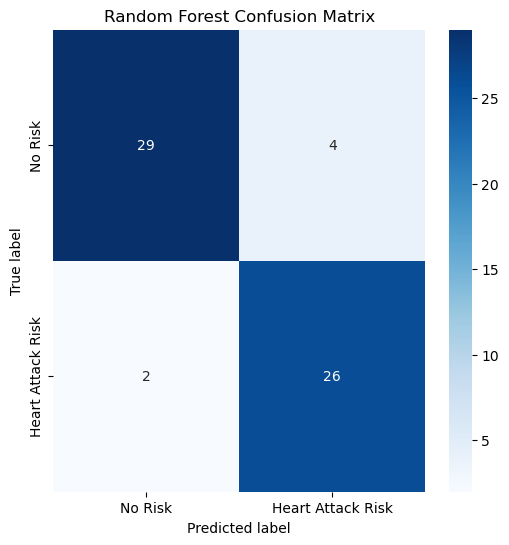

SVM training completed.
ROC-AUC Score: 0.94

SVM Results:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



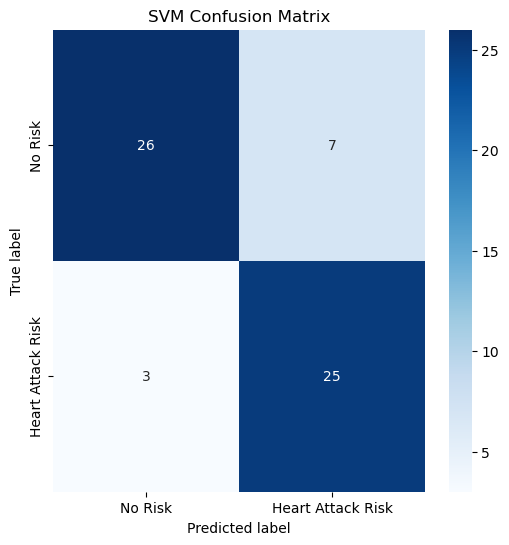

Logistic Regression training completed.
ROC-AUC Score: 0.95

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



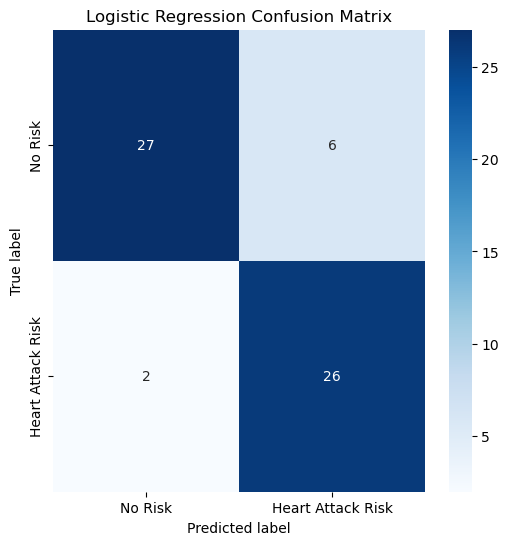

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} training completed.")

    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}")
    else:
        print(f"{name} does not support predict_proba().")

    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk", "Heart Attack Risk"], yticklabels=["No Risk", "Heart Attack Risk"])
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

# Displaying Accuracies

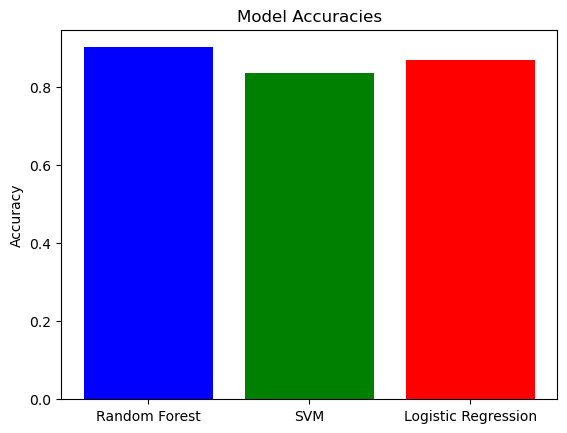

In [23]:
accuracies = {name: model.score(X_test, y_test) for name, model in models.items()}
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.show()

## Model Accuracies

This bar chart presents the accuracy scores of three machine learning models: Random Forest, Support Vector Machine (SVM), and Logistic Regression.

| Model | Accuracy |
|---|---|
| Random Forest | 0.88 |
| SVM | 0.80 |
| Logistic Regression | 0.82 |

The Random Forest model demonstrates the highest accuracy, followed closely by Logistic Regression. SVM, while still performing well, shows slightly lower accuracy compared to the other to models.

# Saving best model

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

# Explanation of `rf_model.fit(X_train, y_train)`

## Model: Random Forest Classifier
The `RandomForestClassifier` is an ensemble learning method that combines multiple decision trees to make predictions. It uses a voting mechanism where each tree contributes to the final prediction, making it robust and less prone to overfitting.

In [25]:
joblib.dump(rf_model, "heart_model_rf.pkl")
joblib.dump(scaler, "scaler_rf.pkl")
print("Random Forest model and scaler saved!")

Random Forest model and scaler saved!
